In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [36]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [37]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [38]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [39]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [40]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [42]:
# 1. Find the most recent date in the data set.
recentdate_str = session.query(Measurement.date).order_by((Measurement.date).desc()).first()[0]
recentdate_str

'2017-08-23'

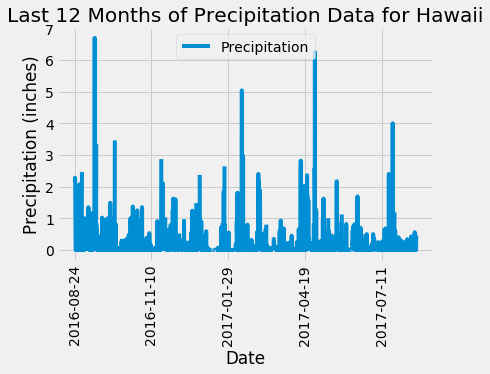

In [43]:
# 2. Design a query to retrieve the last 12 months of precipitation data and plot the results, 
    # starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = dt.datetime.strptime(recentdate_str,'%Y-%m-%d').date()
#recent_date = dt.datetime(2017, 8, 23) - alternate code using output above
start_date = recent_date - dt.timedelta(days=365)
#start_date - to view result

# 3. Perform a query to retrieve the data and precipitation scores for the last 12 months (recent year)
recent_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>start_date)
#for x in recent_year:
#    print(x) - to view result

# 4. Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(recent_year, columns = ['Date', 'Precipitation'])
df.set_index('Date', inplace=True)

# 5. Sort the dataframe by date
df_sorted = df.sort_values(by="Date") #, ascending=True)
#df_sorted - to view result

# 6. Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot()
plt.ylabel("Precipitation (inches)")
plt.title("Last 12 Months of Precipitation Data for Hawaii")
plt.xticks(rotation = 90)
plt.show()


In [44]:
# 7. Use Pandas to view the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# 1. Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()[0][0]

9

In [46]:
# 2. Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
#Identify the single most active station
most_active = active_stations[0][0]
most_active

'USC00519281'

In [48]:
# 3. Using the most active station id from the previous query, calculate the lowest, highest, 
# and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), \
              func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

In [65]:
# 4. Using the most active station id, query the last 12 months of temperature 
    # observation data for this station and plot the results as a histogram

# Find the most recent date in the specific station data.
# Calculate the date one year from the most recent date for that station data.
recentdate_str = session.query(func.max(Measurement.date)).first()[0]
recent_date = dt.datetime.strptime(recentdate_str,'%Y-%m-%d').date()
recent_year = recent_date - dt.timedelta(365)

# Perform a query to retrieve the temp data for the last 12 months (recent year)
results = session.query(Measurement.tobs).filter((Measurement.date>recent_year)&(Measurement.station==most_active)).all()

# Save the query results as a Pandas DataFrame
df=pd.DataFrame(results)

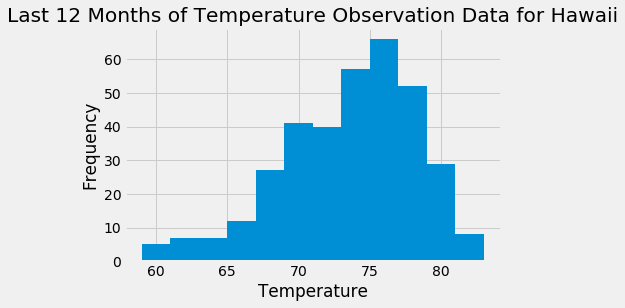

In [64]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the results as a histogram with bins=12
plt.hist(df[0], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Last 12 Months of Temperature Observation Data for Hawaii")
plt.show()

# Close session

In [66]:
# Close Session
session.close()